In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TSLA')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-55-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,1.592667,1.666667,1.169333,1.266667,281494500
1,1.588667,2.028000,1.553333,1.719333,257806500
2,1.464000,1.728000,1.351333,1.666667,123282000
3,1.280000,1.540000,1.247333,1.533333,77097000
4,1.074000,1.333333,1.055333,1.333333,103003500


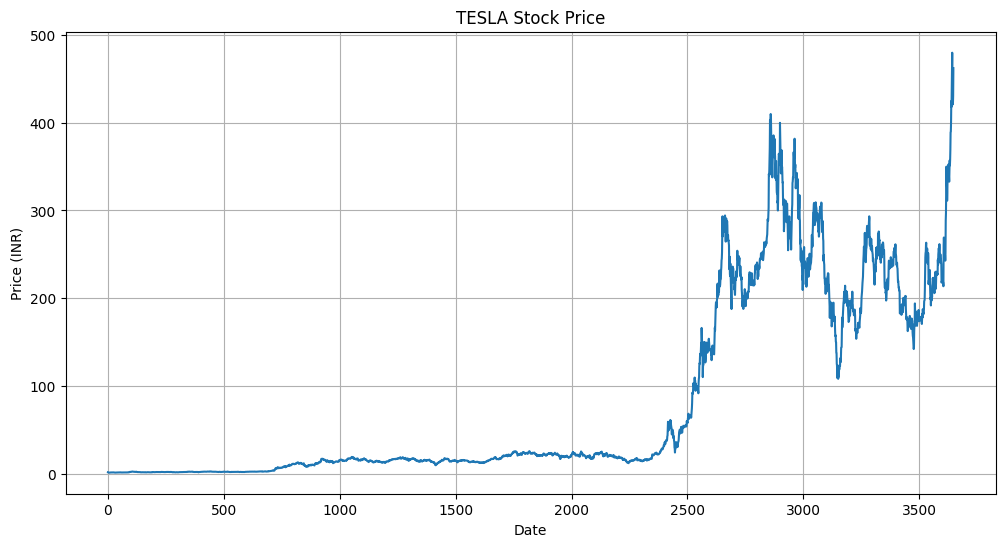

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TESLA Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,1.592667,1.666667,1.169333,1.266667,281494500
1,1.588667,2.028000,1.553333,1.719333,257806500
2,1.464000,1.728000,1.351333,1.666667,123282000
3,1.280000,1.540000,1.247333,1.533333,77097000
4,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...
3643,440.130005,488.540009,427.010010,466.500000,149340800
3644,436.170013,456.359985,420.019989,451.880005,118566100
3645,421.059998,447.079987,417.640015,425.510010,132216200


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3643,268.9051
3644,271.0406
3645,272.9305
3646,275.0679


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

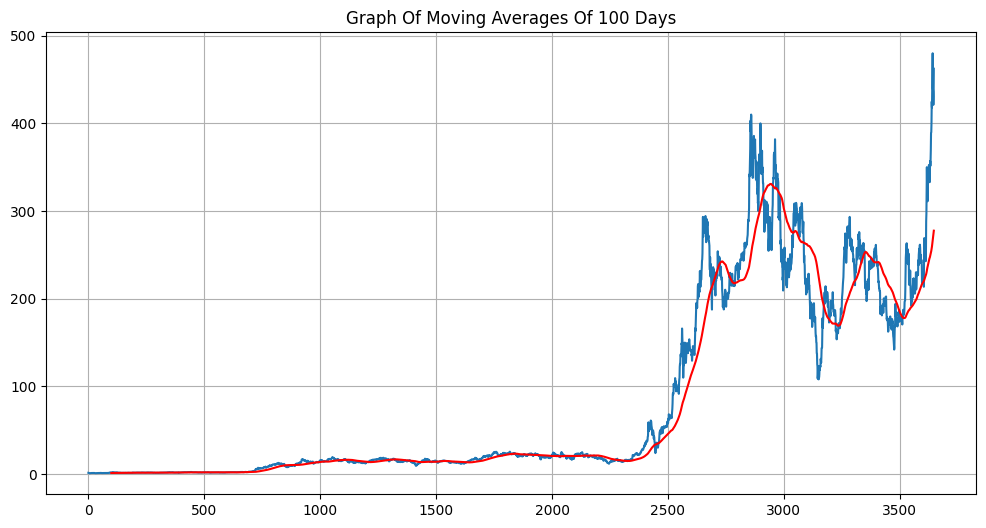

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [ ]:

ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3643,228.45850
3644,229.75665
3645,230.96870
3646,232.24500


In [ ]:
df.shape

(3648, 5)

In [ ]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2553, 7)
(1095, 7)


In [ ]:

train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
2553,2020-08-19,125.235336,125.235336,127.400002,122.747330,124.333336,183079500
2554,2020-08-20,133.455338,133.455338,134.799332,123.804001,124.045334,309177000
2555,2020-08-21,136.665329,136.665329,139.699326,135.003326,136.317337,322344000
2556,2020-08-24,134.279999,134.279999,141.933334,128.501328,141.751999,300954000
2557,2020-08-25,134.889328,134.889328,135.196671,131.199997,131.659332,159883500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.0013988 ],
       [0.00454612],
       [0.0028905 ],
       ...,
       [0.88062596],
       [0.90586465],
       [1.        ]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2453, 100, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 261ms/step - loss: 0.0103 - mean_absolute_error: 0.0664
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 23s 291ms/step - loss: 0.0016 - mean_absolute_error: 0.0256
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 284ms/step - loss: 0.0018 - mean_absolute_error: 0.0245
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 40s 269ms/step - loss: 0.0019 - mean_absolute_error: 0.0265
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0016 - mean_absolute_error: 0.0232
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 268ms/step - loss: 0.0016 - mean_absolute_error: 0.0227
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 269ms/step - loss: 0.0025 - mean_absolute_error: 0.0302
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 41s 267ms/step - loss: 0.0013 - mean_absolute_error: 0.0206
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 280ms/step - loss: 0.0016 - mean_absolute_error: 0.0241
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 261ms/step - loss: 0.0014 - mean_absolute_error: 0.0226


In [ ]:
model.save('TESLA_stock_model.h5')

In [ ]:

test_close.shape

(1095, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

In [ ]:
final_df = past_100_days._append(test_df, ignore_index = True)

In [ ]:
final_df.head()

,0
0,32.935333
1,32.748669
2,33.133331
3,31.673332
4,29.760000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00742334],
       [0.00698695],
       [0.00788622],
       ...,
       [0.90679136],
       [0.90157801],
       [0.94770311]])

In [ ]:
input_data.shape

(1195, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1095, 100, 1)
(1095,)


In [ ]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step


In [ ]:

y_pred.shape

(1095, 1)

In [ ]:

y_test

array([0.21738709, 0.21985739, 0.24603933, ..., 0.90679136, 0.90157801,
       0.94770311])

In [ ]:

scaler.scale_

array([0.00233781])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

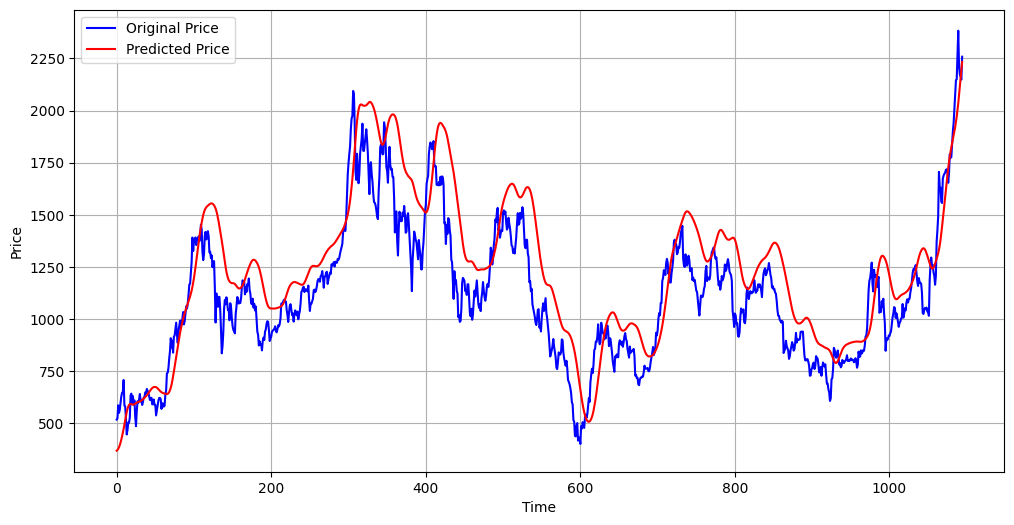

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 14.63%


In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.6342976898882106


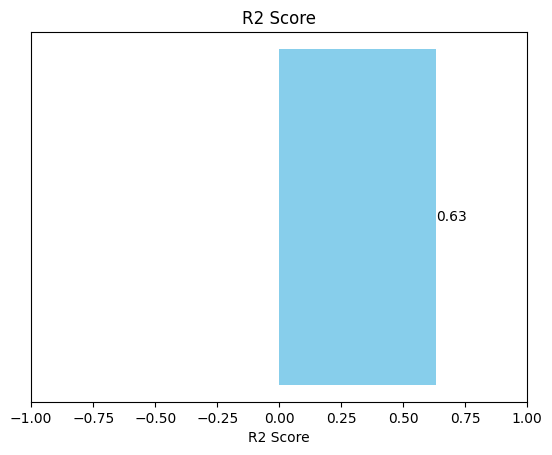

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

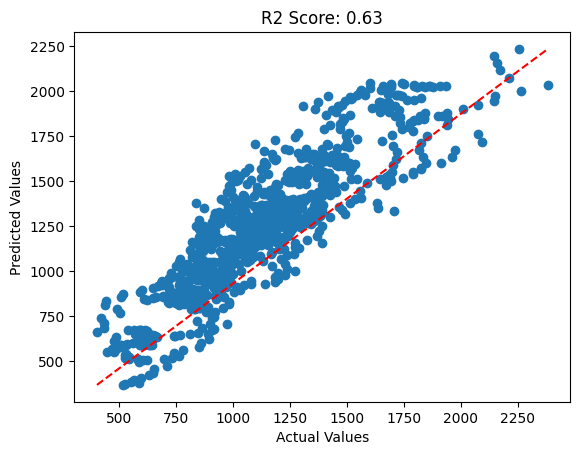

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()